## HW11_Assignment2_zn352, Time Series Clustering of Business Establishment in NYC

### Data Prep

In [16]:
# NYC zipfile

from geopandas import GeoDataFrame
import os

file_path = os.getenv('PUIDATA') + '/nyc-zip-code-tabulation-areas-polygons.geojson'
df_zip = GeoDataFrame.from_file(file_path)

In [107]:
df_zip = df_zip.rename(columns={'postalCode': 'zip'})
zipcodes = df_zip[['zip', 'borough', 'geometry']]
zipcodes.zip = pd.to_numeric(zipcodes.zip)
zipcodes.head()

,zip,borough,geometry
0,11372,Queens,POLYGON ((-73.86942457284175 40.74915687096787...
1,11004,Queens,POLYGON ((-73.71068374074007 40.75004039450917...
2,11040,Queens,POLYGON ((-73.70098278625547 40.73889569923034...
3,11426,Queens,POLYGON ((-73.72270447144122 40.75373371438336...
4,11365,Queens,POLYGON ((-73.81088634744755 40.72717187575918...


In [ ]:
# Business Census data

## download file into local directory 

#!for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done
    
#!for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done
    
#!for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

In [104]:
import numpy as np
import pandas as pd
import zipfile

df_merge = zipcodes.copy()

Year = range(1994,2015)
yy = []

for i in Year:
    i = str(i)[2:4]
    yy.append(i)  
for j in yy:
    fname = 'zbp' + j + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df_EST = df.loc[:,['zip','est']]
    df_merge = pd.merge(df_merge, df_EST, on='zip')
    df_merge = df_merge.rename(columns={'est': 'EST%s'%j})

In [151]:
df_merge.head()

,zip,borough,geometry,EST94,EST95,EST96,EST97,EST98,EST99,EST00,...,EST05,EST06,EST07,EST08,EST09,EST10,EST11,EST12,EST13,EST14
0,11372,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,1229,1236,1292,1309,1351,1376,1409,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,11004,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,194,188,176,192,194,186,189,...,225,226,238,227,233,229,222,241,241,250
2,11040,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,1422,1414,1335,1344,1344,1350,1350,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534
3,11426,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,326,219,209,198,203,217,213,...,226,226,228,226,237,248,256,266,258,260
4,11365,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,492,476,483,522,509,519,553,...,604,608,617,616,628,643,677,679,714,731


## Cluster time series by K-Means

In [152]:
df_merge.shape

(243, 24)

In [169]:
mydata = df_merge.drop(['borough','geometry'],axis=1)

In [168]:
mydata = mydata.set_index('zip')

In [165]:
mydata_whiten = mydata.apply(lambda x:(x-x.mean())/x.std(), axis=0)

In [171]:
mydata_whiten.shape

(243, 21)

In [172]:
from sklearn.cluster import KMeans

In [173]:
cluster_km = KMeans(n_clusters=5).fit(mydata)

## Plot clusters and centers

In [ ]:
# plot time series or scatter? 

In [209]:
cluster_km.cluster_centers_

array([[ 2240.41666667,  2291.83333333,  2336.25      ,  2426.66666667,
         2477.66666667,  2517.08333333,  2572.25      ,  2592.66666667,
         2601.        ,  2649.66666667,  2698.33333333,  2753.91666667,
         2770.58333333,  2778.16666667,  2814.58333333,  2828.5       ,
         2883.33333333,  2938.58333333,  3000.08333333,  3055.83333333,
         3111.91666667],
       [  620.87179487,   627.43589744,   640.92307692,   657.20512821,
          666.56410256,   669.58974359,   677.58974359,   683.80769231,
          715.48717949,   729.1025641 ,   744.35897436,   754.56410256,
          757.32051282,   766.93589744,   777.05128205,   789.01282051,
          811.15384615,   826.92307692,   849.15384615,   873.1025641 ,
          890.34615385],
       [ 5770.        ,  5922.        ,  5919.        ,  6031.        ,
         6058.88888889,  6031.44444444,  6139.88888889,  6161.55555556,
         5895.88888889,  5868.77777778,  6062.55555556,  5971.55555556,
         6008.

In [ ]:
# 
mydata.plot(ax=ax, marker='o', color='red', markersize=5)

## Hierarchy Clustering

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [188]:
Z = linkage(mydata, 'ward')

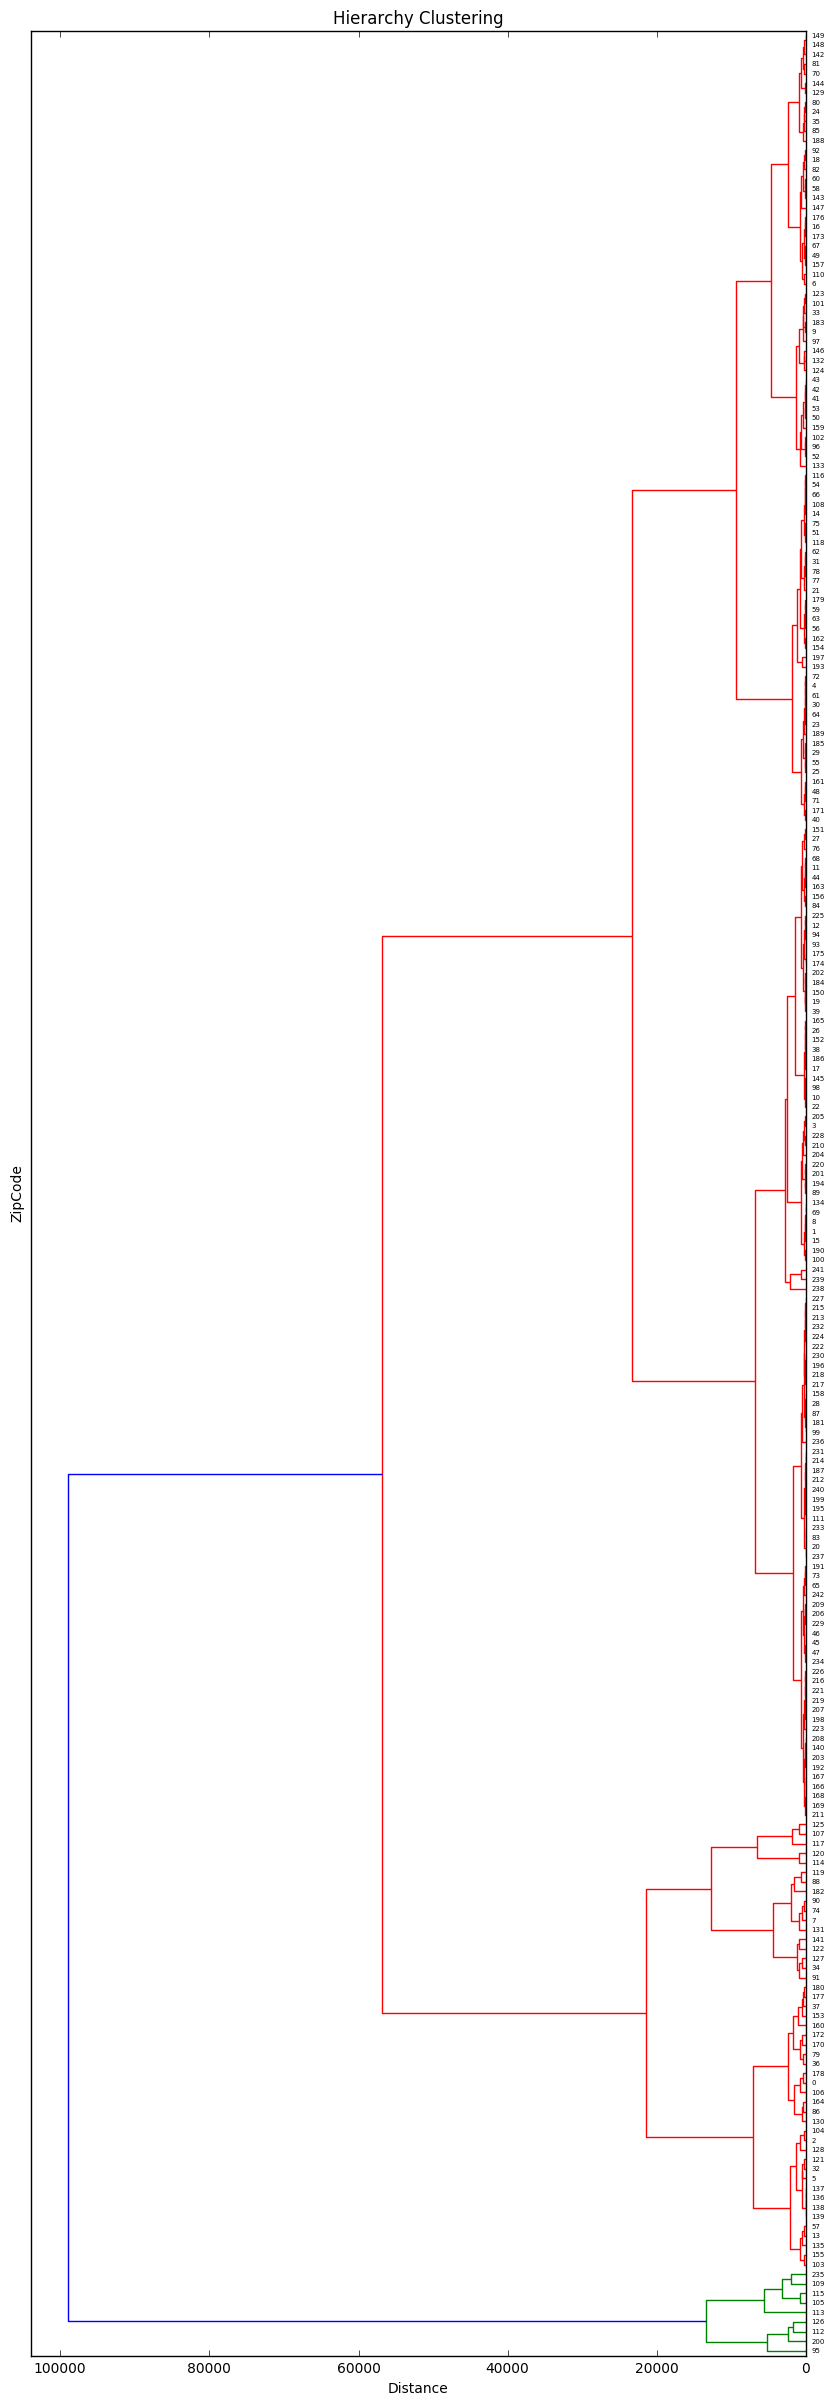

In [199]:
plt.figure(figsize=(10,30))
dendrogram(Z, orientation='left')
plt.title('Hierarchy Clustering')
plt.xlabel('Distance')
plt.ylabel('ZipCode')
plt.show()

# Plot shapefile

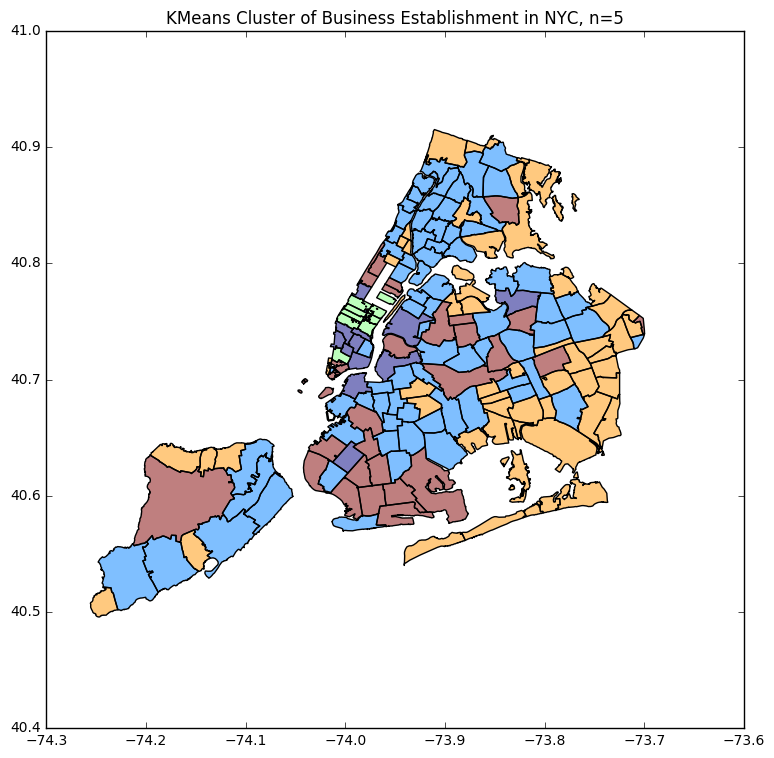

In [205]:
f, ax = plt.subplots(figsize=(9, 9))
df_merge.plot(column='KMeans', ax=ax)
ax.set_title('KMeans Cluster of Business Establishment in NYC, n=5')
plt.savefig('HW11_zn352.png')